In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mesa_star_class import MESA_STAR as ms
import os, glob
import mesa_reader as mr
import astropy.units as u
import astropy.constants as c
%matplotlib inline

In [7]:
carbon_free_models = ['/vol/hal/halraid/schanlar/Condor/carbon_free/2.3000_0.0200_0.0000',
                      '/vol/hal/halraid/schanlar/Condor/carbon_free/2.4000_0.0200_0.0000',
                      '/vol/hal/halraid/schanlar/Condor/carbon_free/2.5000_0.0200_0.0000']

regular_models = ['/vol/aibn1107/data2/schanlar/HeCoresCondor/full_data/2.3000_0.0200_0.0000',
                  '/vol/aibn1107/data2/schanlar/HeCoresCondor/full_data/2.4000_0.0200_0.0000',
                  '/vol/aibn1107/data2/schanlar/HeCoresCondor/full_data/2.5000_0.0200_0.0000']

In [13]:
ORIG_MATPLOTLIB_CONF = dict(plt.rcParams) # Store original settings

def _prepare_canvas(fig_width = None, fig_height = None,
                    columns = 1, fontsize = 8, revert = False):
    '''
    The basic canvas for plots
    '''

    # FIXME: Change canvas


    assert(columns in [1,2]), f'Columns: {columns} must be either 1 or 2'

    if fig_width is None:
        if columns == 2:
            fig_width = 3.5
        else:
            fig_width = 7

    if fig_height is None:
        golden_mean = (np.sqrt(5.0) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean # height in inches

    params = {'backend': 'pdf',
              #'text.latex.preamble':
              #[ r'\usepackage{siunitx}',
              #  r'\usepackage[utf8]{inputenc}',
              #  r'\usepackage[T1]{fontenc}',
              #  r'\DeclareSIUnit \jansky {Jy}' ],
              'axes.labelsize' : fontsize,
              'axes.titlesize' : fontsize,
              'font.size': fontsize,
              'legend.fontsize' : fontsize,
              'xtick.labelsize' : fontsize,
              'ytick.labelsize' : fontsize,
              #'xtick.major.size' : 18,
              #'xtick.minor.size' : 9,
              #'ytick.major.size' : 18,
              #'ytick.minor.size' : 9,
              #'xtick.major.width' : 0.8,
              #'xtick.minor.width' : 0.6,
              #'ytick.major.width' : 0.8,
              #'ytick.minor.width' : 0.6,
              'axes.linewidth' : 2,
              'lines.linewidth' : 1,
              'text.usetex' : True,
              'figure.figsize' : [fig_width, fig_height],
              'font.family' : 'serif',
              'savefig.bbox' : 'tight',
              'savefig.dpi' : 600  # set to 600 for poster printing or PR
                                  # figures
    }

    plt.rcParams.update(params)



    if revert:
        plt.rcParams.update(ORIG_MATPLOTLIB_CONF) # Call global configuration
                                                  # for plots



def _capture_density(t,rho_0,Q,t_comp,ft):
    '''
    Density for electron captures
    '''

    rho = rho_0/(1 + (3*c.k_B*t/Q)* np.log(2*np.log(2)*(c.k_B*t/(c.m_e*c.c**2))**5 * (Q/(c.k_B*t))**2 * (t_comp/ft)))
    return rho



def _burning_regions(mesa_dir = '/vol/aibn1107/data2/schanlar/mesa-r10398',
                xlim=None,
                ylim=None,
                ecap_density_corrections=True,
                t_comp=1e4*u.yr):

    '''
    Define various burning and other relative regions according
    to the data stored in $MESA_DIR
    '''


    # hydrogen_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/hydrogen_burn.data')
    helium_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/helium_burn.data')
    carbon_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/carbon_burn.data')
    oxygen_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/oxygen_burn.data')
    electron_degeneracy_line = os.path.join(mesa_dir,'data/star_data/plot_info/psi4.data')



    # hburn = np.genfromtxt(hydrogen_burning_line)
    heburn = np.genfromtxt(helium_burning_line)
    cburn = np.genfromtxt(carbon_burning_line)
    oburn = np.genfromtxt(oxygen_burning_line)
    electron = np.genfromtxt(electron_degeneracy_line)


    # Radiation pressure line
    logrho = np.arange(-9.0,10.0,0.1)
    logt = np.log10(3.2e7) + (logrho - np.log10(0.7))/3.0


    plt.plot(heburn[:,0],heburn[:,1],ls=':',color='black')
    plt.text(5.1, 7.95, 'He burn', fontsize=22,
            rotation=0, rotation_mode='anchor')


    plt.plot(cburn[:,0],cburn[:,1],ls=':',color='black')
    plt.text(5.1, 8.67, 'C burn', fontsize=22,
            rotation=0, rotation_mode='anchor')


    plt.plot(oburn[:,0],oburn[:,1],ls=':',color='black')
    plt.text(5.1, 9.05, 'O burn', fontsize=22,
            rotation=0, rotation_mode='anchor')

    plt.plot(electron[:,0],electron[:,1],ls='--',color='black')

    plt.plot(logrho,logt,ls='--',color='black')

    plt.text(7.0, 9.5, r'$\epsilon_{\rm F}/k T \simeq 4$', 
        fontsize=22, rotation=0, rotation_mode='anchor')

    plt.text(5.12, 9.5, r'$P_{\rm rad}\simeq P_{\rm gas}$', 
        fontsize=22, rotation=0, rotation_mode='anchor')


    # Weak reaction lines
    plt.text(9.05, 7.71, r'$^{25}{\rm Mg}\leftrightarrow ^{25}{\rm Na}$', 
        fontsize=15, rotation=90,verticalalignment='bottom')

    plt.text(9.25, 7.71, r'$^{23}{\rm Na} \leftrightarrow ^{23}{\rm Ne}$', 
        fontsize=15, rotation=90,verticalalignment='bottom'
)
    plt.text(9.65, 7.71, r'$^{24}{\rm Mg}\rightarrow ^{24}{\rm Na}$', 
        fontsize=15, rotation=90,verticalalignment='bottom')

    plt.text(9.75, 7.71, r'$^{24}{\rm Na}\rightarrow ^{24}{\rm Ne}$', 
        fontsize=15, rotation=90,verticalalignment='bottom')

    plt.text(9.85, 7.71, r'$^{25}{\rm Na}\leftrightarrow ^{25}{\rm Ne}$', 
        fontsize=15, rotation=90,verticalalignment='bottom')

    plt.text(10.00, 7.71, r'$^{20}{\rm Ne}\rightarrow ^{20}{\rm F}\rightarrow  ^{20}{\rm O}$', 
        fontsize=15, rotation=90,verticalalignment='bottom')


    if ecap_density_corrections:
        t = np.arange(7.5,11,0.1)
        t = 10**t * u.K
        rho_ce = _capture_density(t,10**9.96,7.025*u.MeV,t_comp,10**9.801*u.s)
        plt.plot(np.log10(rho_ce),np.log10(t.value),color='red',ls='--')
    else:
        plt.axvline(x=9.96,color='tab:red',ls='-')

    plt.text(10.0, 8.3, r'$e^{-}$cSN', fontsize=25, rotation=90,color='red',verticalalignment='bottom')

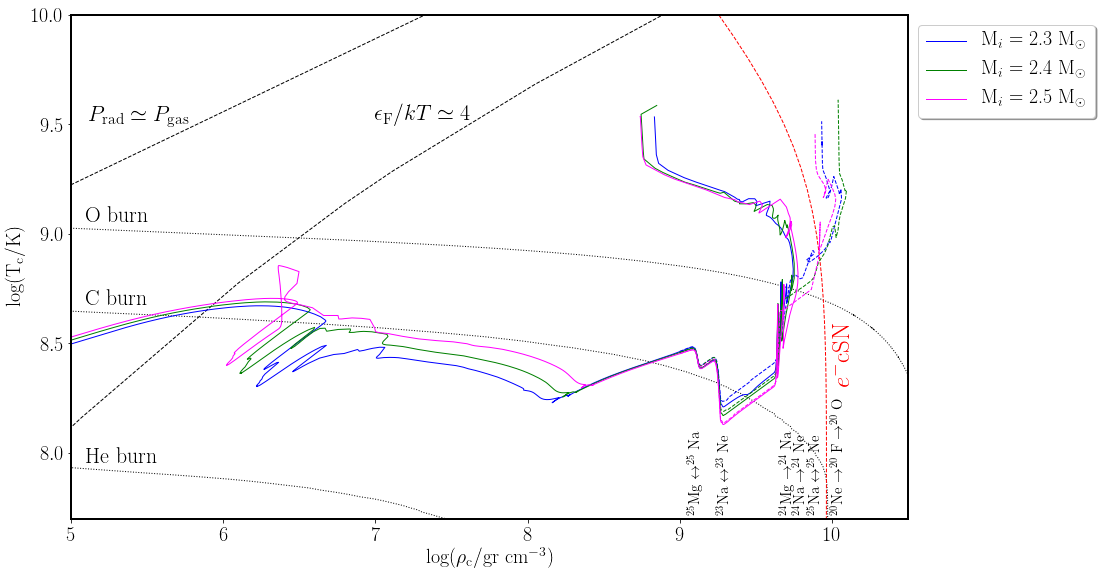

In [5]:
_prepare_canvas(fig_width = 15, columns = 2,
                           fontsize = 20)
_burning_regions()
plt.xlim([5, 10.5])
plt.ylim([7.7, 10.0])
plt.xlabel(r'$\log(\rm \rho_c / \rm gr \ \rm cm^{-3})$')
plt.ylabel(r'$\log(\rm T_c / \rm K)$')

colors = ['blue', 'green', 'magenta']

mask = 9.0
#_prepare_canvas(revert=True)
for idx, path in enumerate(regular_models):
    
    info = path.split('/')
    info = info[-1]
    
    star1 = ms.from_string(info, history_path = os.path.join(path, 'LOGS'))
    num = ms.find_profile_number(os.path.join(carbon_free_models[idx],'LOGS'))
    star2 = ms.from_string(info, history_path = os.path.join(carbon_free_models[idx],'LOGS'),
                          profile_path = os.path.join(carbon_free_models[idx],'LOGS'), profile_number = num)
    
    #star2.getCoreMass()
    
    tag1 = r'M$_i=$ ' + str(round(float(star1.getMass()), 1)) + r' M$_{\odot}$'
    #tag2 = r'$Z=$' + str(round(float(star1.getMetallicity()), 3)) + r';$f=$' + str(round(float(star1.getOvershoot()),3))
    
    h1 = star1.getHistory()
    h2 = star2.getHistory()
    
    plt.plot(h1.data('log_center_Rho'), h1.data('log_center_T'), color = colors[idx], label = f'{tag1}')
    plt.plot(h2.data('log_center_Rho')[np.where(h2.data('log_center_Rho') >= mask)], 
             h2.data('log_center_T')[np.where(h2.data('log_center_Rho') >= mask)],
             color = colors[idx], linestyle = '--')
    
    legend = plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1), shadow = True)

#plt.savefig('carbon_free_poster.pdf')

In [35]:
import mesa_reader as mr
import mesaPlot as mp
from matplotlib import gridspec

In [21]:
path = '/vol/aibn1107/data2/schanlar/HeCoresCondor/full_data/1.8000_0.0200_0.0140/LOGS'
path2 = '/vol/aibn1107/data2/schanlar/HeCoresCondor/full_data/2.5000_0.0200_0.0000/LOGS'

In [22]:
h = mr.MesaData(f'{path}/history.data')
h2 = mr.MesaData(f'{path2}/history.data')

In [9]:
!head -6 '/vol/aibn1107/data2/schanlar/HeCoresCondor/full_data/1.8000_0.0200_0.0140/LOGS/history.data'

                           1                            2                            3                            4                            5 
              version_number                 initial_mass                    initial_z                    burn_min1                    burn_min2 
                       10398      1.8000000000000000E+000      2.0000000000000000E-002      5.0000000000000000E+001      1.0000000000000000E+003 

                                       1                                        2                                        3                                        4                                        5                                        6                                        7                                        8                                        9                                       10                                       11                                       12                                       13                             

In [23]:
for idx,value in enumerate(h2.data('log_center_Rho')):
    if value >= 9.0:
        print(h2.data('model_number')[idx])
        break

12520


/vol/aibn1107/data2/schanlar/HeCoresCondor/full_data/1.8000_0.0200_0.0140/LOGS/profile52.data


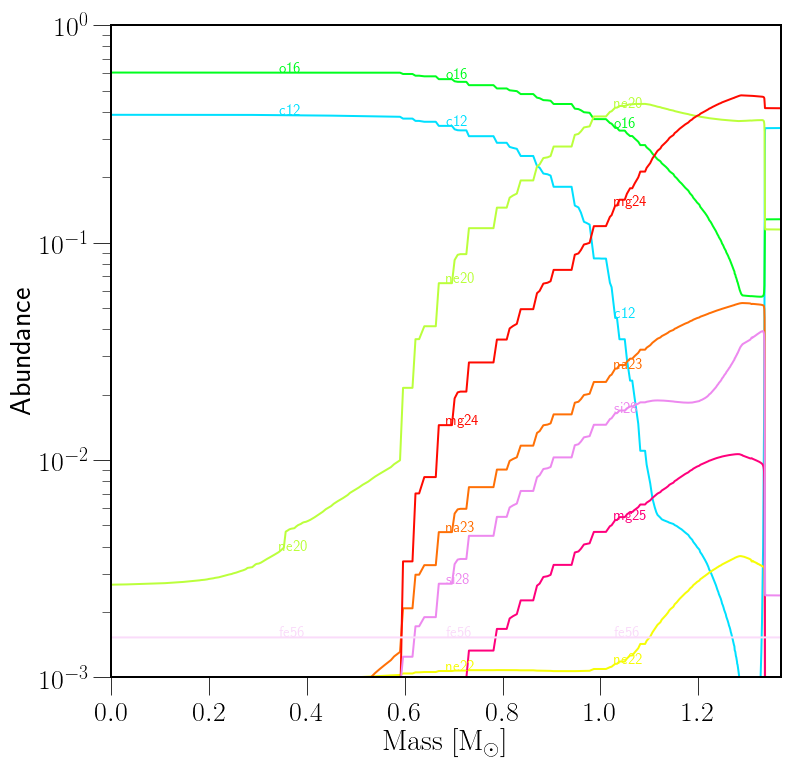

In [33]:
m1 = mp.MESA()
m1.log_fold = path

m1.loadHistory()
m1.loadProfile(num=16200)
p1 = mp.plot()



# Create three different plots regarding abundances
p1.plotAbun(m1, show = False)
plt.savefig('1p8_logRho9_abun_poster.pdf', dpi = 600, bbox_inches = 'tight')



/vol/aibn1107/data2/schanlar/HeCoresCondor/full_data/2.5000_0.0200_0.0000/LOGS/profile66.data


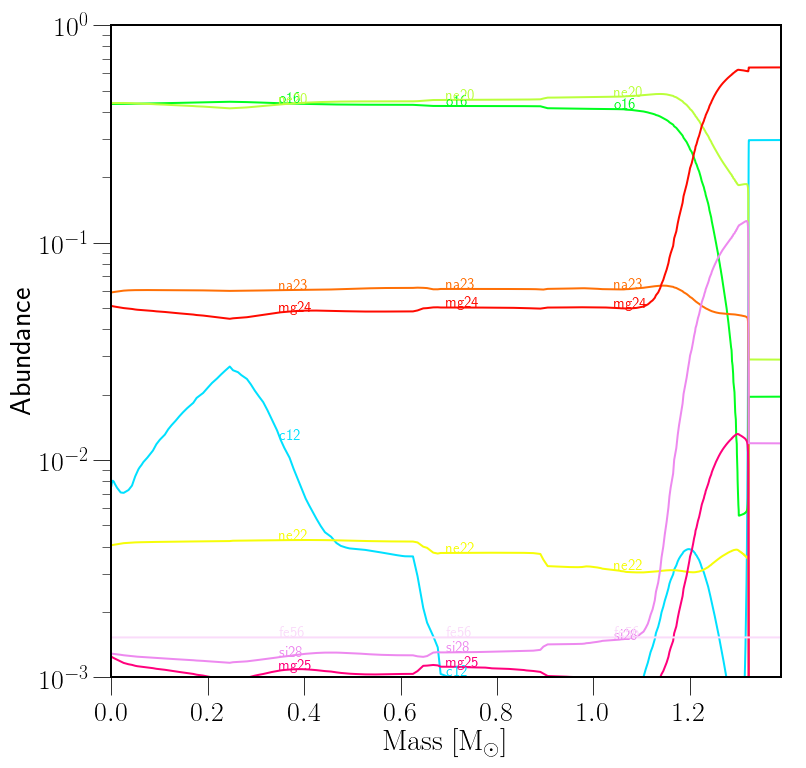

In [34]:
m2 = mp.MESA()
m2.log_fold = path2

m2.loadHistory()
m2.loadProfile(prof=66)
p2 = mp.plot()

p2.plotAbun(m2, show = False)
plt.savefig('2p5_logRho9_abun_poster.pdf', dpi = 600, bbox_inches = 'tight')